In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import scipy.sparse
import random
import tensorflow as tf

In [2]:
''' load dataset from sklearn '''
from sklearn.datasets import fetch_rcv1
rcv1 = fetch_rcv1(shuffle=True)# change arrangment of sample randomly 

In [3]:
N_SAMPLES = 10000 
from sklearn.utils import resample
X1, y1 = resample(rcv1.data, rcv1.target, replace=False,
                n_samples=N_SAMPLES, random_state=1234)
X1 = X1.toarray()
y1 = y1.toarray()

In [4]:
!pip3 install susi

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for susi: filename=susi-1.2.1-py3-none-any.whl size=26802 sha256=5da871fc44eca4168206ee20eb8ca605e1f8ca59740516586d604b514a3dcd0e
  Stored in directory: /root/.cache/pip/wheels/e2/59/d8/96662bf0bdb4c28ca890bd07e5801e789648fccc835c8da285
Successfully built susi


# **SUSI SOM**

In [5]:
import susi

# initialize and fit SOM
som = susi.SOMClustering(n_rows=30,n_columns=30,n_iter_unsupervised =1000,learning_rate_start=0.5)
                         
som.fit(X1)

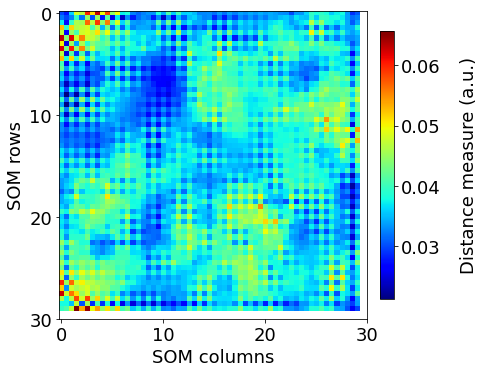

In [6]:
from susi.SOMPlots import plot_estimation_map,plot_nbh_dist_weight_matrix,plot_som_histogram,plot_umatrix
u_matrix = som.get_u_matrix()
plot_umatrix(u_matrix, 30, 30, cmap="jet")
plt.show()

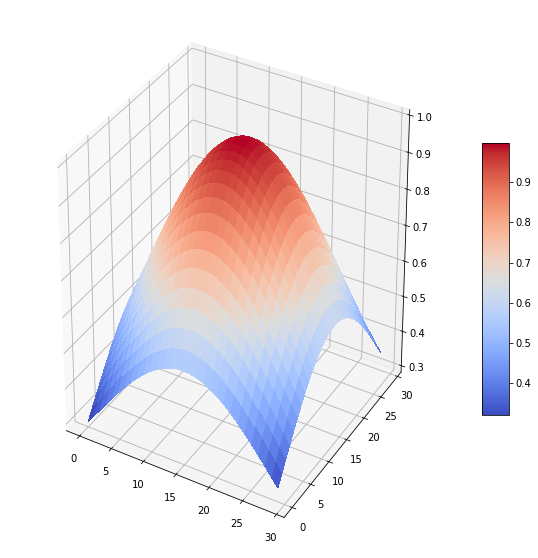

In [7]:
plot_nbh_dist_weight_matrix(som)
plt.show()

In [8]:
clusters = som.get_clusters(X1)

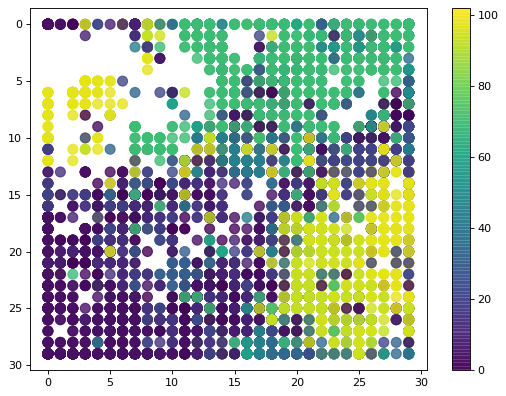

In [10]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x=[c[1] for c in clusters], y=[c[0] for c in clusters], c=np.argmax(y1, axis=1), alpha=0.8,s=80)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()